<a href="https://colab.research.google.com/github/sunilkumar1762/Github_data_repo/blob/main/Github_Repo_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the new GitHub repository data
file_path = '/content/Github_data.csv'
github_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(github_data.head())


   Unnamed: 0.1  Unnamed: 0         topic  \
0             0           0  Data-Science   
1             1           1  Data-Science   
2             2           2  Data-Science   
3             3           3  Data-Science   
4             4           4  Data-Science   

                                                name              user   star  \
0                                              keras        keras-team  47.9k   
1                                       scikit-learn      scikit-learn  40.3k   
2                          PythonDataScienceHandbook           jakevdp  23.1k   
3  Probabilistic-Programming-and-Bayesian-Methods...  CamDavidsonPilon    21k   
4                          Data-Science--Cheat-Sheet          abhat222  18.4k   

    fork watch  issue pull_requests  ...  \
0  18.1k  2.1k  2,940            87  ...   
1  19.6k  2.2k  1,505           764  ...   
2   9.9k  1.5k     65            67  ...   
3   6.6k  1.4k    127            38  ...   
4   8.2k  1.5k      7 

In [4]:
# Display data types
print(github_data.dtypes)

Unnamed: 0.1          int64
Unnamed: 0            int64
topic                object
name                 object
user                 object
star                 object
fork                 object
watch                object
issue                object
pull_requests        object
projects            float64
topic_tag            object
discription_text     object
discription_url      object
commits              object
branches             object
packages              int64
releases              int64
contributers         object
License              object
url                  object
dtype: object


In [5]:
# Display summary statistics
print(github_data.describe())

       Unnamed: 0.1   Unnamed: 0     projects     packages     releases
count   1500.000000  1500.000000  1313.000000  1500.000000  1500.000000
mean     149.500000    49.500000     0.545316     0.002667     0.002667
std       86.630941    28.875697     3.801632     0.051588     0.051588
min        0.000000     0.000000     0.000000     0.000000     0.000000
25%       74.750000    24.750000     0.000000     0.000000     0.000000
50%      149.500000    49.500000     0.000000     0.000000     0.000000
75%      224.250000    74.250000     0.000000     0.000000     0.000000
max      299.000000    99.000000   113.000000     1.000000     1.000000


In [6]:
# Check for missing values
print(github_data.isnull().sum())

Unnamed: 0.1          0
Unnamed: 0            0
topic                 0
name                  0
user                  0
star                  0
fork                  0
watch                 0
issue                 0
pull_requests         0
projects            187
topic_tag             0
discription_text     20
discription_url     831
commits               0
branches              0
packages              0
releases              0
contributers          0
License               0
url                   0
dtype: int64


In [8]:
# Convert relevant columns to numeric
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(',', '').replace('k', '000').replace('+', '').strip()
        try:
            return float(x)
        except ValueError:
            return 0
    return x

columns_to_convert = ['star', 'fork', 'watch', 'issue', 'commits', 'branches', 'releases']
for col in columns_to_convert:
    github_data[col] = github_data[col].apply(convert_to_number)
    github_data[col] = pd.to_numeric(github_data[col], errors='coerce')

# Handle missing values
github_data.fillna(0, inplace=True)

# Verify data cleaning
print(github_data.dtypes)
print(github_data.isnull().sum())


Unnamed: 0.1          int64
Unnamed: 0            int64
topic                object
name                 object
user                 object
star                float64
fork                float64
watch               float64
issue               float64
pull_requests        object
projects            float64
topic_tag            object
discription_text     object
discription_url      object
commits             float64
branches            float64
packages              int64
releases              int64
contributers         object
License              object
url                  object
dtype: object
Unnamed: 0.1        0
Unnamed: 0          0
topic               0
name                0
user                0
star                0
fork                0
watch               0
issue               0
pull_requests       0
projects            0
topic_tag           0
discription_text    0
discription_url     0
commits             0
branches            0
packages            0
releases            0
co

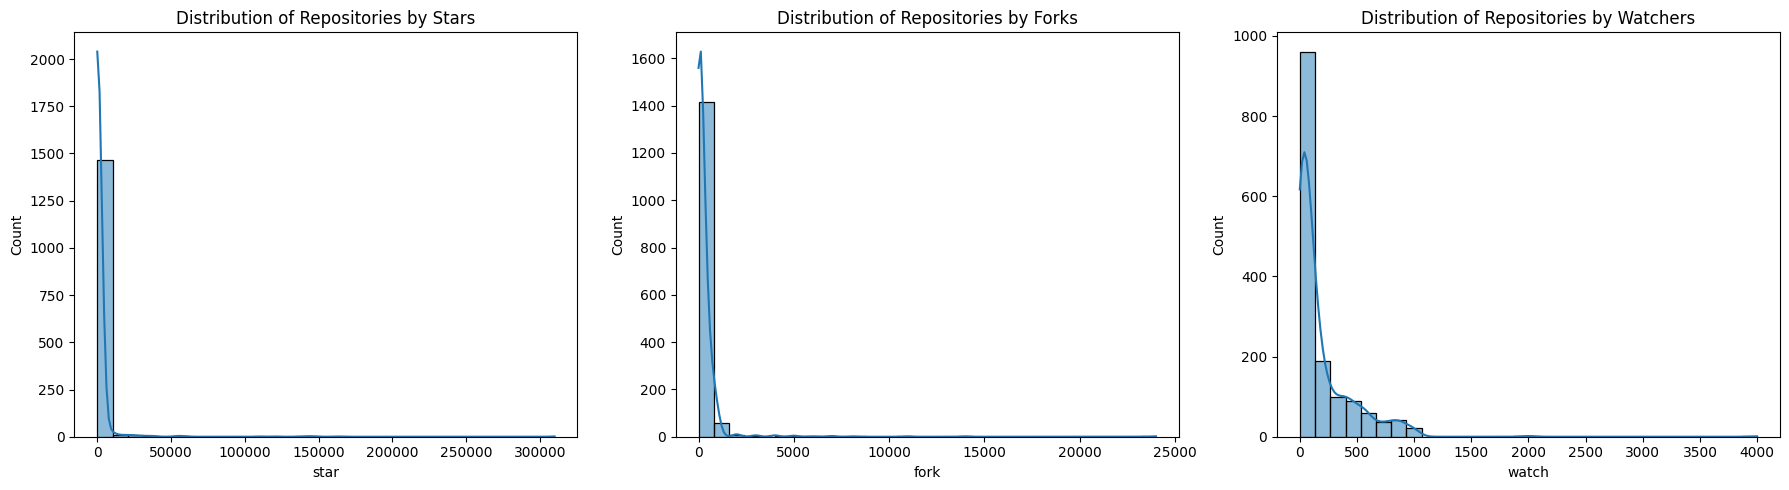

In [10]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(github_data['star'], bins=30, kde=True)
plt.title('Distribution of Repositories by Stars')

plt.subplot(1, 3, 2)
sns.histplot(github_data['fork'], bins=30, kde=True)
plt.title('Distribution of Repositories by Forks')

plt.subplot(1, 3, 3)
sns.histplot(github_data['watch'], bins=30, kde=True)
plt.title('Distribution of Repositories by Watchers')

plt.tight_layout()
plt.show()

In [11]:
# Top repositories by stars
top_repositories_by_stars = github_data.sort_values(by='star', ascending=False).head(10)
print(top_repositories_by_stars[['name', 'user', 'star']])


                             name          user      star
1000                 freeCodeCamp  freeCodeCamp  310000.0
1001                          vue         vuejs  163000.0
1002                        react      facebook  147000.0
100                    tensorflow    tensorflow  144000.0
1003                    bootstrap          twbs  140000.0
1004             You-Dont-Know-JS        getify  120000.0
1100  coding-interview-university       jwasham  110000.0
1012                     three.js        mrdoob   60000.0
1015           30-seconds-of-code    30-seconds   56000.0
1105           30-seconds-of-code    30-seconds   56000.0


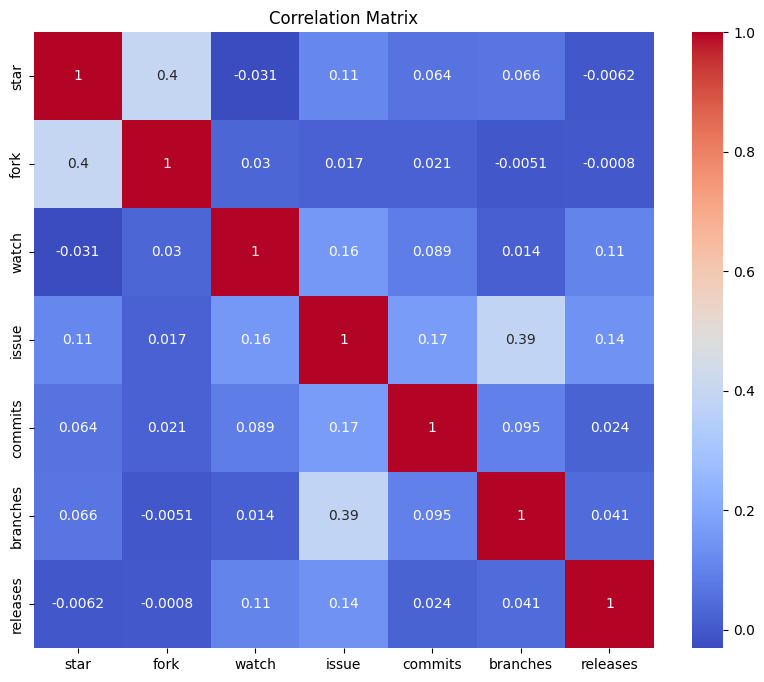

In [12]:
# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(github_data[columns_to_convert].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


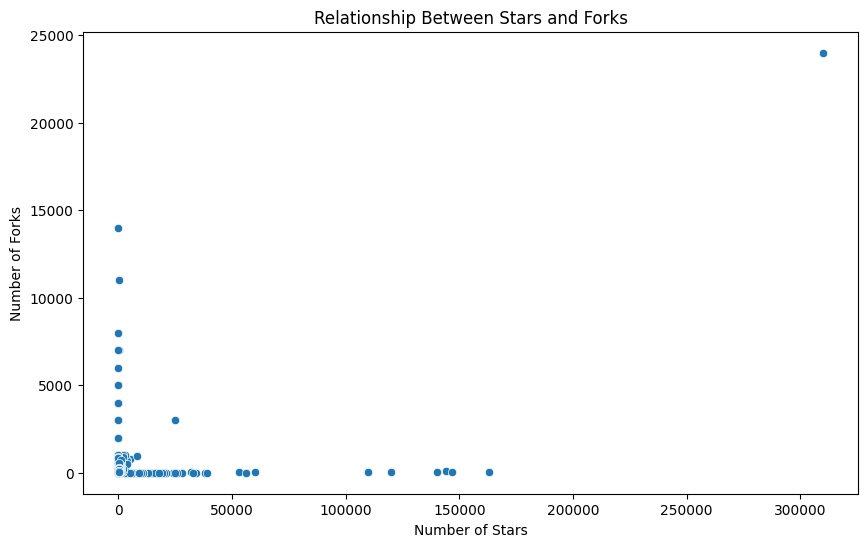

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=github_data, x='star', y='fork')
plt.title('Relationship Between Stars and Forks')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Forks')
plt.show()


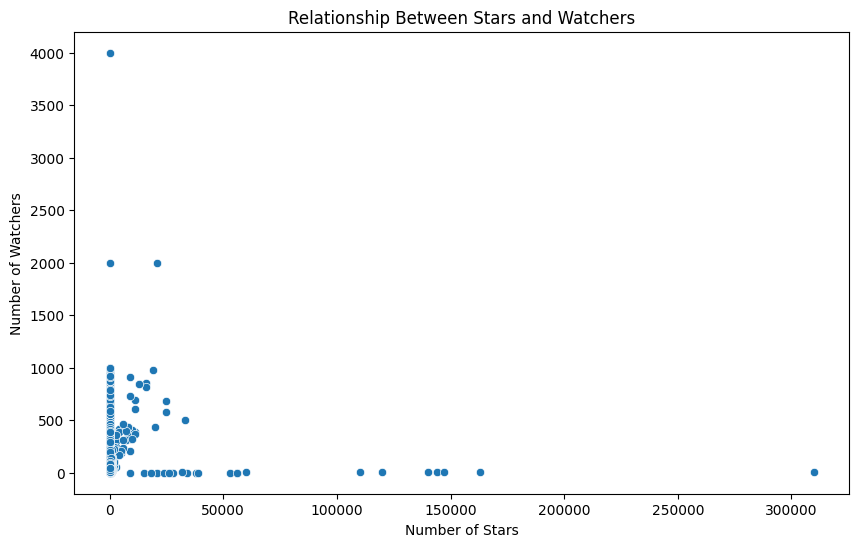

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=github_data, x='star', y='watch')
plt.title('Relationship Between Stars and Watchers')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Watchers')
plt.show()


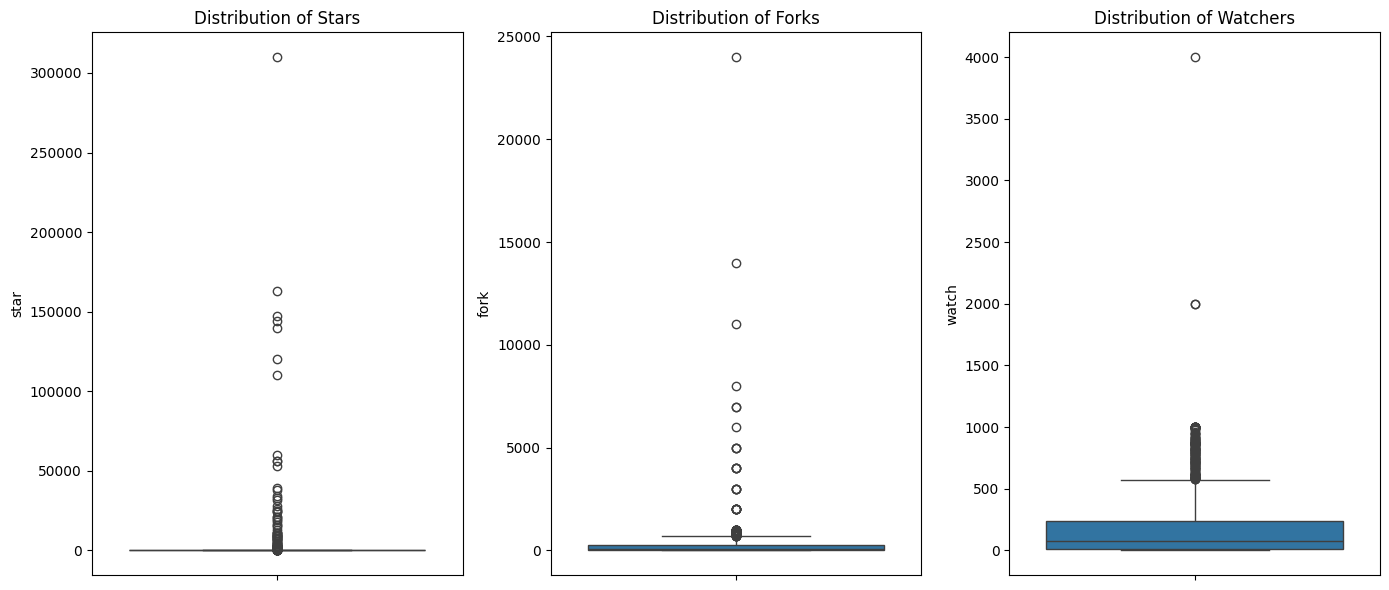

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=github_data, y='star')
plt.title('Distribution of Stars')

plt.subplot(1, 3, 2)
sns.boxplot(data=github_data, y='fork')
plt.title('Distribution of Forks')

plt.subplot(1, 3, 3)
sns.boxplot(data=github_data, y='watch')
plt.title('Distribution of Watchers')

plt.tight_layout()
plt.show()


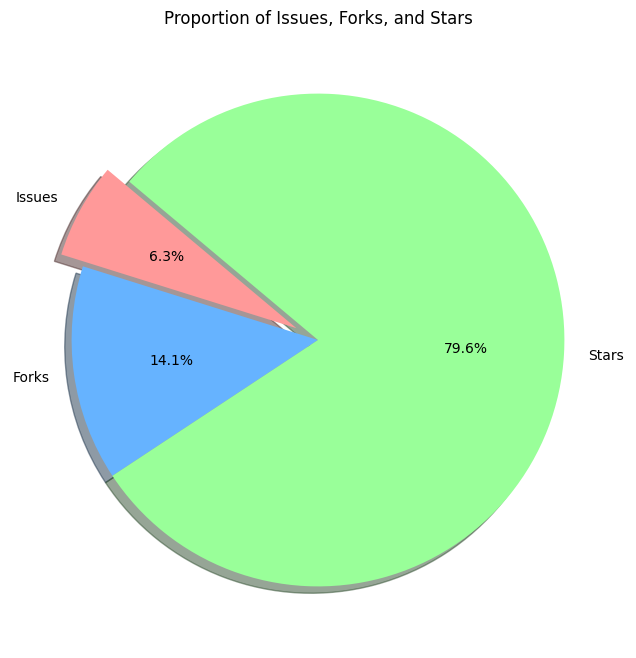

In [20]:
# Summing up total values for issues, forks, and stars
total_issues = github_data['issue'].sum()
total_forks = github_data['fork'].sum()
total_stars = github_data['star'].sum()

# Creating the pie chart
labels = ['Issues', 'Forks', 'Stars']
sizes = [total_issues, total_forks, total_stars]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Issues, Forks, and Stars')
plt.show()


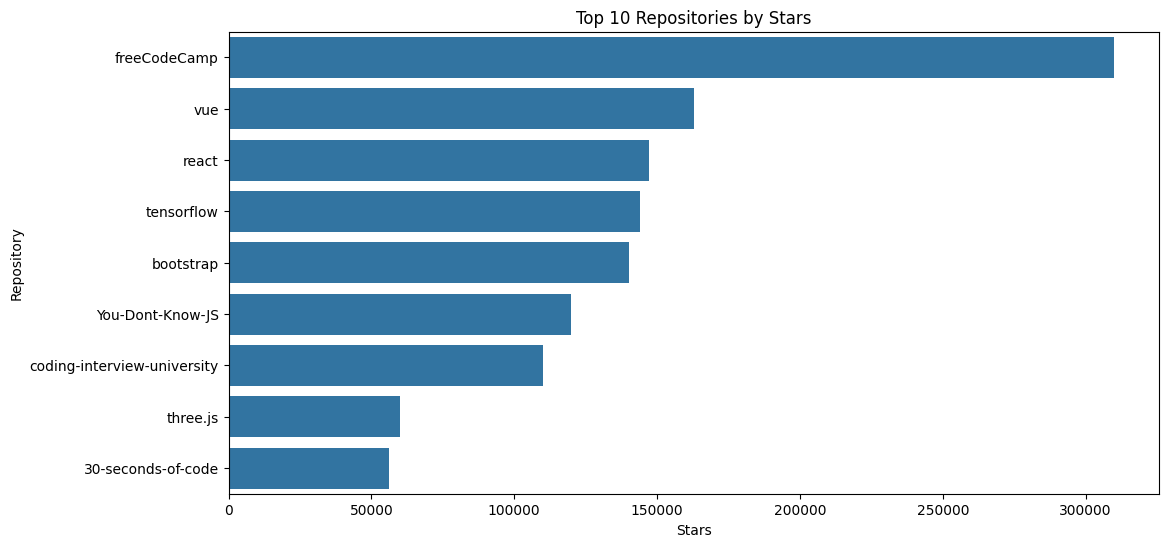

In [13]:
# Bar plot of top repositories by stars
plt.figure(figsize=(12, 6))
sns.barplot(data=top_repositories_by_stars, x='star', y='name')
plt.title('Top 10 Repositories by Stars')
plt.xlabel('Stars')
plt.ylabel('Repository')
plt.show()
